<a href="https://colab.research.google.com/github/RifaldiAchmad/K-Means-Project/blob/main/K_Means_Project_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [31]:
!git clone https://github.com/RifaldiAchmad/K-Means-Project.git

fatal: destination path 'K-Means-Project' already exists and is not an empty directory.


# **Ecploratory Data Analysis**

In [32]:
df = pd.read_excel('/content/K-Means-Project/Data Curah Hujan Jawa Tengah 2015-2024.xlsx', index_col=0)
df

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Stasiun,,,,,,,,,,
Stamet Tunggul Wulung,294.0,171.9,371.0,298.1,365.0,157.5,286.2,364.4,139.2,444.3
Stageof Banjarnegara,460.9,258.2,480.4,540.1,765.9,196.5,615.0,244.7,76.6,517.4
Stamet Maritim Tegal,419.0,234.0,396.0,85.0,551.0,524.2,235.7,361.8,260.7,231.3
Staklim Jawa Tengah,238.2,269.0,282.0,348.6,217.0,301.3,272.7,329.3,297.7,303.4
Stamet Maritim Tanjung Emas,215.0,222.0,247.3,268.8,370.0,336.3,300.8,206.0,314.9,319.1
Stamet Ahmad Yani,221.2,284.4,256.4,350.7,234.8,321.1,215.4,266.2,343.5,203.6


In [33]:
# Cek banyaknya sampel data
num_samples = df.shape[0]
print(f"Number of samples: {num_samples}")

Number of samples: 6


In [34]:
# Cek statistika deskriptif data
df.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,308.050000,239.916667,338.850000,315.216667,417.283333,306.150000,320.966667,295.400000,238.766667,336.516667
std,106.724575,40.351378,92.463479,147.236699,208.708681,128.702599,147.523160,65.931267,106.706245,122.043819
min,215.000000,171.900000,247.300000,85.000000,217.000000,157.500000,215.400000,206.000000,76.600000,203.600000
25%,225.450000,225.000000,262.800000,276.125000,267.350000,222.700000,244.950000,250.075000,169.575000,249.325000
50%,266.100000,246.100000,326.500000,323.350000,367.500000,311.200000,279.450000,297.750000,279.200000,311.250000
75%,387.750000,266.300000,389.750000,350.175000,505.750000,332.500000,297.150000,353.675000,310.600000,413.000000
max,460.900000,284.400000,480.400000,540.100000,765.900000,524.200000,615.000000,364.400000,343.500000,517.400000


In [35]:
# Cek tipe data
df.dtypes

2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
2024    float64
dtype: object

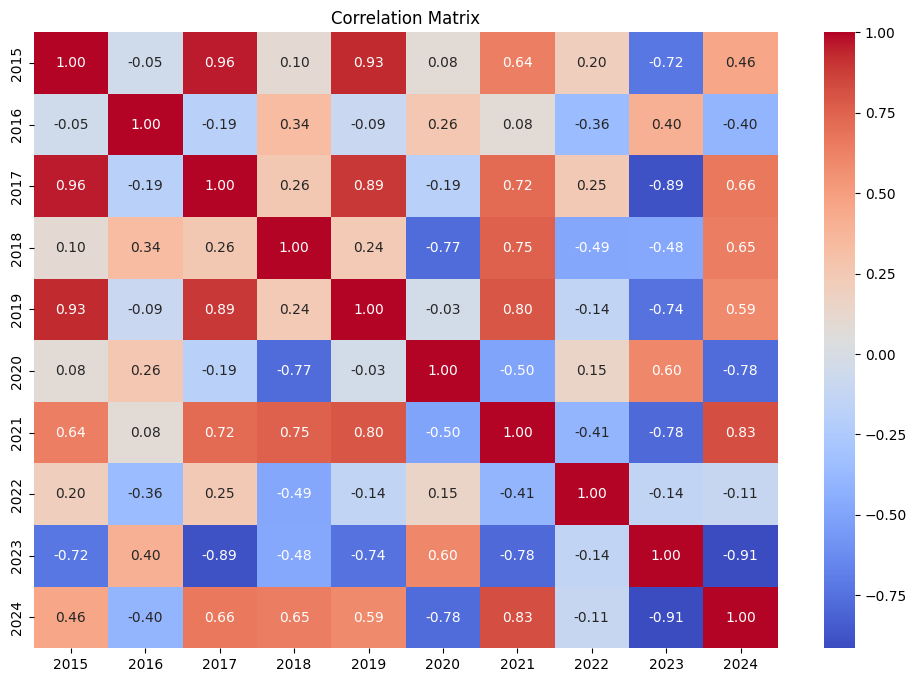

In [36]:
# Matriks korelasi
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Data Prepocessing**

In [37]:
# Melakukan reduksi dimensi variabel pada data dengan PCA
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(df)

# Buat DataFrame baru dari hasil PCA
dfPCA = pd.DataFrame(data=dataset_pca, columns=['PC1', 'PC2'])
dfPCA

,PC1,PC2
0,46.140764,-109.451707
1,607.933335,-36.223451
2,-65.123490,389.940428
3,-192.736440,-125.908602
4,-129.297340,-24.652412
5,-266.916829,-93.704256


In [38]:
scaler = StandardScaler()
x = scaler.fit_transform(dfPCA)
x

array([[ 0.1596667 , -0.61411829],
       [ 2.1037084 , -0.20324474],
       [-0.22535503,  2.18790145],
       [-0.66695022, -0.70645564],
       [-0.44742389, -0.13832125],
       [-0.92364597, -0.52576154]])

# **K Means Analysis**

In [39]:
# WCSS (Within-Cluster Sum of Squares)
wcss = []
max_clusters = min(10, num_samples)  # Ensure the number of clusters is <= number of samples
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dfPCA)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

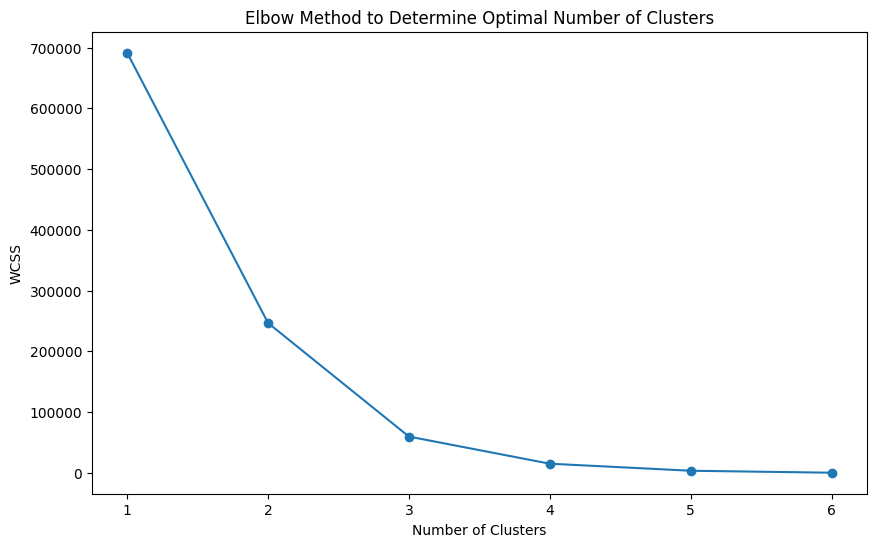

In [40]:
# Plot WCSS (elbow method) untuk menentukan banyaknya cluster optimal
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


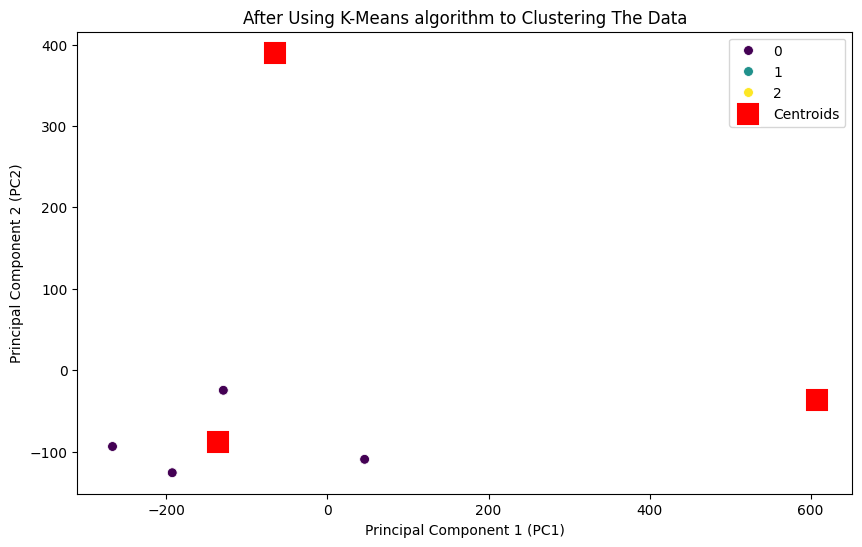

In [41]:
# Perform KMeans clustering with the optimal number of clusters (let's assume 3 for this example)
optimal_clusters = 3  # You can change this based on the elbow plot

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = optimal_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dfPCA)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=dfPCA['PC1'], y=dfPCA['PC2'], hue=y_kmeans, palette='viridis', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', label='Centroids', s=300, marker=',')

plt.grid(False)
plt.title('After Using K-Means algorithm to Clustering The Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

In [42]:
# Add cluster labels to the original DataFrame
df['Cluster'] = y_kmeans
df

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Cluster
Stasiun,,,,,,,,,,,
Stamet Tunggul Wulung,294.0,171.9,371.0,298.1,365.0,157.5,286.2,364.4,139.2,444.3,0
Stageof Banjarnegara,460.9,258.2,480.4,540.1,765.9,196.5,615.0,244.7,76.6,517.4,1
Stamet Maritim Tegal,419.0,234.0,396.0,85.0,551.0,524.2,235.7,361.8,260.7,231.3,2
Staklim Jawa Tengah,238.2,269.0,282.0,348.6,217.0,301.3,272.7,329.3,297.7,303.4,0
Stamet Maritim Tanjung Emas,215.0,222.0,247.3,268.8,370.0,336.3,300.8,206.0,314.9,319.1,0
Stamet Ahmad Yani,221.2,284.4,256.4,350.7,234.8,321.1,215.4,266.2,343.5,203.6,0
